# IPL 2023 Data Analysis & Visualizations

## 1. Importing Required Libraries

To begin our analysis, we import the essential libraries:

- `NumPy`: For numerical computations.
- `Pandas`: For handling and analyzing structured data.
- `Matplotlib`: For visualization.
- `Seaborn`: For enhanced statistical data visualization.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Loading the Dataset

We load the cleaned IPL 2023 deliveries dataset into a Pandas DataFrame.

In [2]:
df = pd.read_csv("cleansed_ipl_2023_deliveries.csv")

## 3. Exploring the Dataset

Before diving into analysis, it's crucial to understand the dataset's structure, contents, and key statistics. This includes checking the number of rows and columns, previewing data, and summarizing numerical and categorical features to identify potential issues or patterns.

In [3]:
df.shape  # Shows the number of rows and columns
df.info()  # Shows column data types and non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17386 entries, 0 to 17385
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   match_id          17386 non-null  int64  
 1   season            17386 non-null  int64  
 2   match_no          17386 non-null  int64  
 3   date              17386 non-null  object 
 4   venue             17386 non-null  object 
 5   batting_team      17386 non-null  object 
 6   bowling_team      17386 non-null  object 
 7   innings           17386 non-null  int64  
 8   over              17386 non-null  float64
 9   striker           17386 non-null  object 
 10  bowler            17386 non-null  object 
 11  runs_of_bat       17386 non-null  int64  
 12  extras            17386 non-null  int64  
 13  wide              17386 non-null  int64  
 14  legbyes           17386 non-null  int64  
 15  byes              17386 non-null  int64  
 16  noballs           17386 non-null  int64 

In [4]:
df.head()  # Displays the first five rows

,match_id,season,match_no,date,venue,batting_team,bowling_team,innings,over,striker,bowler,runs_of_bat,extras,wide,legbyes,byes,noballs,wicket_type,player_dismissed,fielder
0,202301,2023,1,2023-03-31,"Narendra Modi Stadium, Ahmedabad",CSK,GT,1,0.1,Conway,Shami,0,0,0,0,0,0,Not Out,No One,No One
1,202301,2023,1,2023-03-31,"Narendra Modi Stadium, Ahmedabad",CSK,GT,1,0.2,Conway,Shami,0,1,0,1,0,0,Not Out,No One,No One
2,202301,2023,1,2023-03-31,"Narendra Modi Stadium, Ahmedabad",CSK,GT,1,0.3,Gaikwad,Shami,0,0,0,0,0,0,Not Out,No One,No One
3,202301,2023,1,2023-03-31,"Narendra Modi Stadium, Ahmedabad",CSK,GT,1,0.4,Gaikwad,Shami,1,0,0,0,0,0,Not Out,No One,No One
4,202301,2023,1,2023-03-31,"Narendra Modi Stadium, Ahmedabad",CSK,GT,1,0.5,Conway,Shami,0,0,0,0,0,0,Not Out,No One,No One


# 4. Data Visualization

To better understand the dataset, we use various data visualization techniques. Below are some key plots that help in analyzing different aspects of the IPL 2023 season.

**Note:** The analysis may contain slight inaccuracies as data for two matches is missing. This could affect certain statistics and visualizations, leading to minor discrepancies from actual IPL 2023 records.

- **Number of Matches Played**

The bar plot illustrates the number of matches played per IPL season, with each season distinguished by a unique color. The x-axis represents the seasons, while the y-axis shows the count of unique matches. The bars are narrower for better clarity, and the "viridis" palette enhances visual distinction.

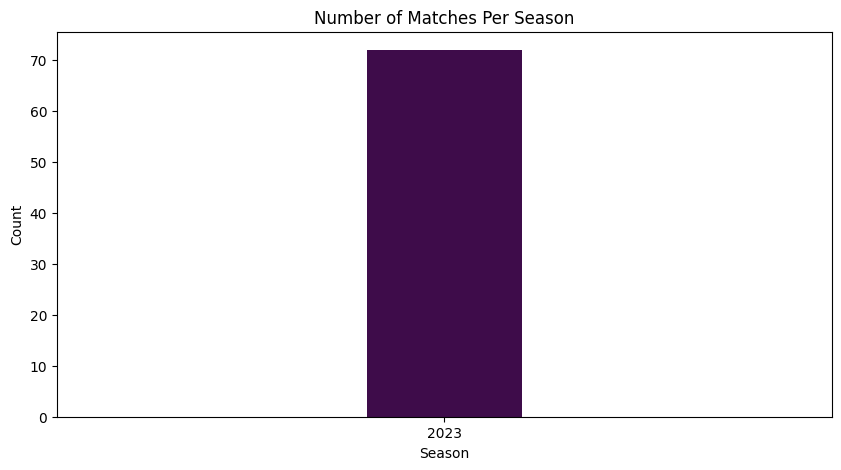

In [5]:
plt.figure(figsize=(10, 5))

match_count = df.groupby("season")["match_id"].nunique()

sns.barplot(x=match_count.index, y=match_count.values, hue=match_count.index, legend=False, palette="viridis", width=0.2)

plt.title("Number of Matches Per Season")
plt.xlabel("Season")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

- **Number of Matches Per Venue**

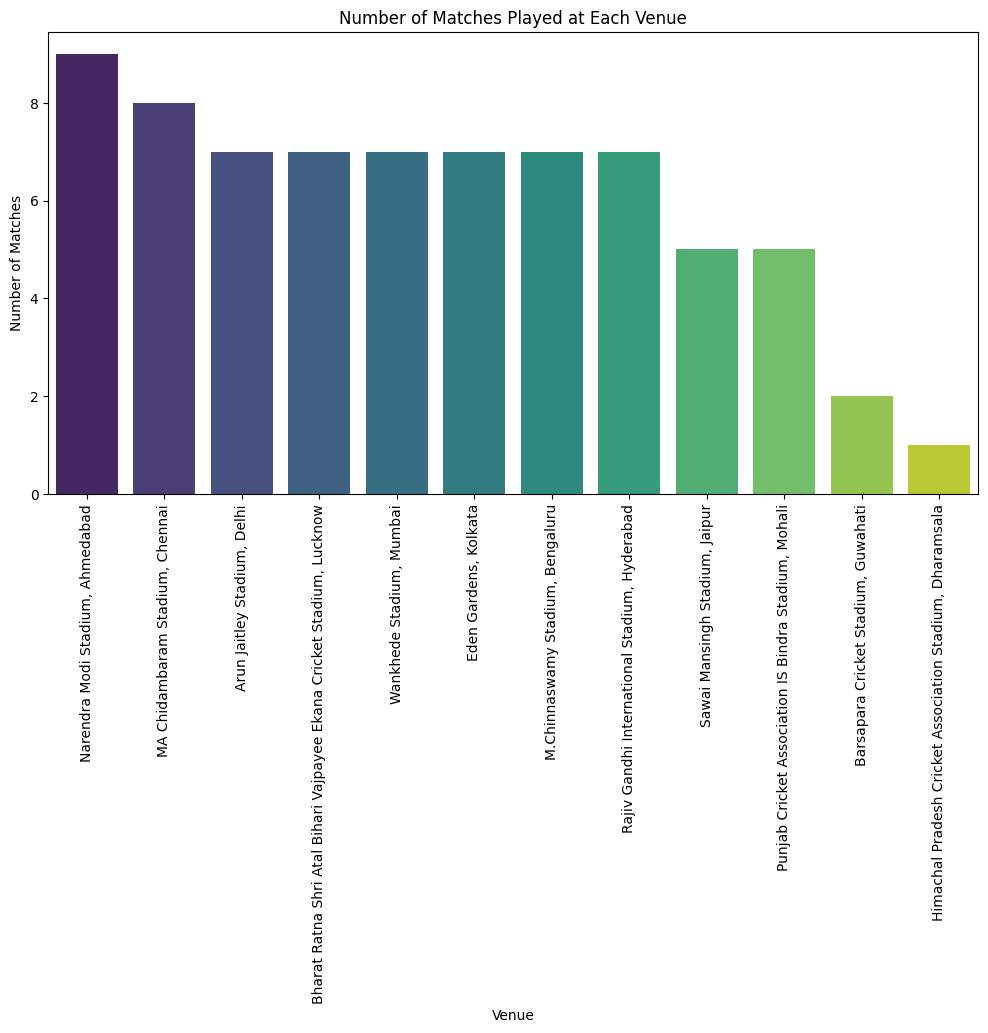

In [6]:
venue_counts = df.groupby("venue")["match_id"].nunique().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=venue_counts.index, y=venue_counts.values, hue=venue_counts.index, legend=False, palette="viridis")

plt.xticks(rotation=90)
plt.xlabel("Venue")
plt.ylabel("Number of Matches")
plt.title("Number of Matches Played at Each Venue")
plt.show()

The bar plot displays the number of matches hosted at each IPL venue in the 2023 season. The x-axis represents the different venues, while the y-axis shows the count of unique matches played. The venues are sorted in descending order based on the number of matches, ensuring a clear comparison. The "viridis" color palette enhances readability, and the bars are rotated for better label visibility.

- **Number of Matches Played by Each Team**

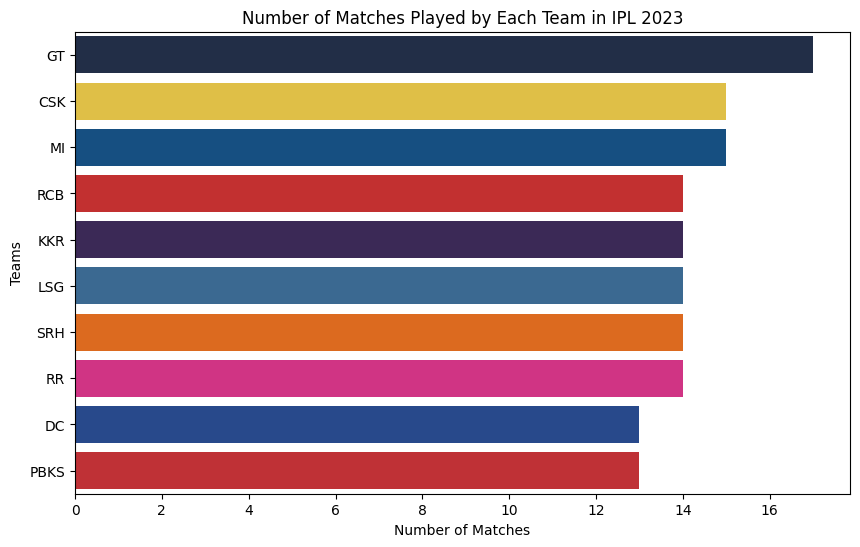

In [7]:
team_counts = df.groupby("batting_team")["match_id"].nunique().sort_values(ascending=False)

team_colors = {
    "CSK": "#F8CD2E",
    "DC": "#17449B",
    "GT": "#1C2C4D",
    "KKR": "#3A225D",
    "LSG": "#2D6A9F",
    "MI": "#045093",
    "PBKS": "#D71920",
    "RR": "#EA1A84",
    "RCB": "#DA1818",
    "SRH": "#FB6400",
}

colors = [team_colors[team] for team in team_counts.index]

plt.figure(figsize=(10, 6))
sns.barplot(y=team_counts.index, x=team_counts.values, hue=team_counts.index, palette=colors, legend=False, orient="h")

plt.xlabel("Number of Matches")
plt.ylabel("Teams")
plt.title("Number of Matches Played by Each Team in IPL 2023")

plt.show()


The horizontal bar plot visualizes the number of matches each IPL team played during the 2023 season. Each team is represented by its respective official color, making the comparison visually intuitive. The x-axis denotes the match count, while the y-axis lists the teams in descending order based on their participation. This plot helps understand team-wise match distribution across the tournament.

- **Runs Scored by Each Team Against Other Teams**

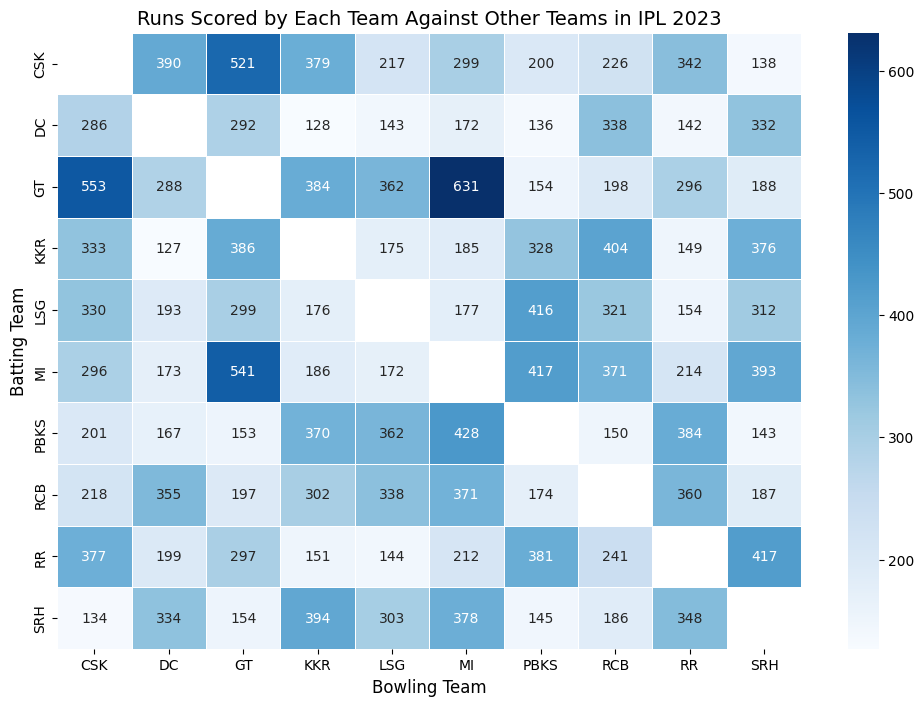

In [8]:
team_vs_team_runs = df.groupby(["batting_team", "bowling_team"])[["runs_of_bat", "extras"]].sum().sum(axis=1).unstack()

plt.figure(figsize=(12, 8))

sns.heatmap(team_vs_team_runs, annot=True, fmt=".0f", cmap="Blues", linewidths=0.5)

plt.title("Runs Scored by Each Team Against Other Teams in IPL 2023", fontsize=14)
plt.xlabel("Bowling Team", fontsize=12)
plt.ylabel("Batting Team", fontsize=12)

plt.show()

The heatmap represents the total runs scored by each IPL team against every other team during the 2023 season, including both runs from the bat and extras. The x-axis denotes the bowling teams, while the y-axis represents the batting teams. Darker shades indicate higher runs scored, making it easy to identify matchups where teams dominated or struggled. This visualization provides insights into team performances against specific opponents.

- **Top 10 Run Scorers**

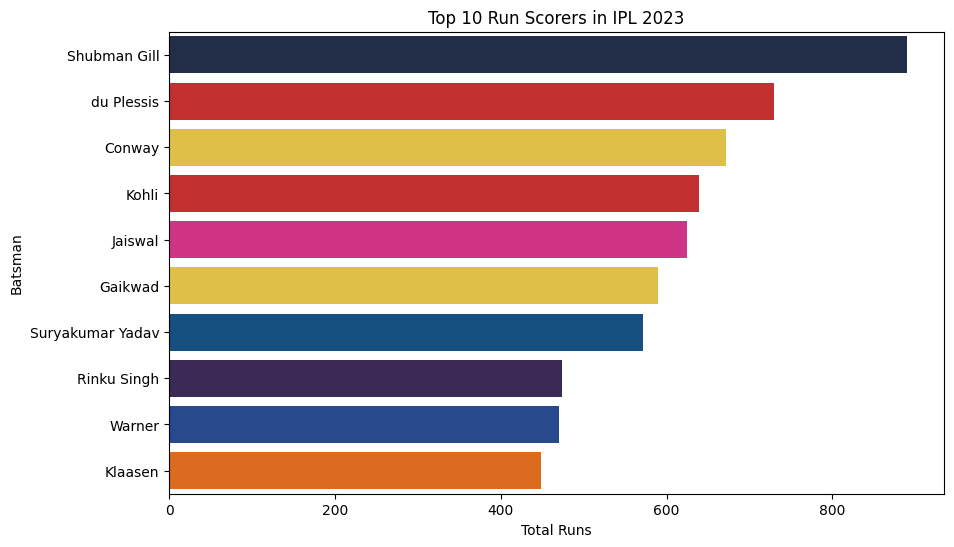

In [9]:
top_scorers = df.groupby(["striker", "batting_team"])["runs_of_bat"].sum().reset_index()
top_scorers = top_scorers.sort_values(by="runs_of_bat", ascending=False).head(10)

player_colors = [team_colors[team] for team in top_scorers["batting_team"]]

plt.figure(figsize=(10, 6))
sns.barplot(y=top_scorers["striker"], x=top_scorers["runs_of_bat"], hue=top_scorers["striker"], palette=player_colors, dodge=False, legend=False, orient="h")

plt.xlabel("Total Runs")
plt.ylabel("Batsman")
plt.title("Top 10 Run Scorers in IPL 2023")
plt.show()

The horizontal bar chart displays the top 10 run scorers in IPL 2023, with each player's bar colored according to their respective team's colors. The x-axis represents the total runs scored, while the y-axis lists the batsmen. This visualization helps in quickly identifying the leading run-scorers of the season and comparing their performances.

- **Top 10 Wicket Takers**

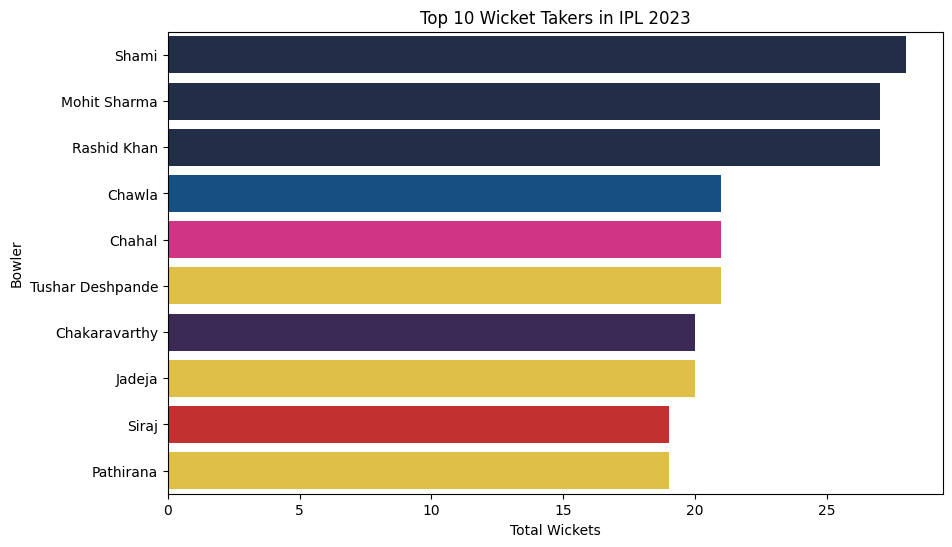

In [10]:
valid_wickets = ["bowled", "lbw", "hit wicket", "caught", "stumped"]
wicket_data = df[df["wicket_type"].isin(valid_wickets)]

top_wicket_takers = (
    wicket_data.groupby(["bowler", "bowling_team"])["wicket_type"]
    .count()
    .reset_index()
    .rename(columns={"wicket_type": "total_wickets"})
)

top_wicket_takers = top_wicket_takers.sort_values(by="total_wickets", ascending=False).head(10)

player_colors = [team_colors[team] for team in top_wicket_takers["bowling_team"]]

plt.figure(figsize=(10, 6))
sns.barplot(
    y=top_wicket_takers["bowler"], 
    x=top_wicket_takers["total_wickets"], 
    hue=top_wicket_takers["bowler"], 
    palette=player_colors, 
    dodge=False, 
    legend=False, 
    orient="h"
)

plt.xlabel("Total Wickets")
plt.ylabel("Bowler")
plt.title("Top 10 Wicket Takers in IPL 2023")
plt.show()


The horizontal bar chart highlights the top 10 wicket-takers of IPL 2023, with each bowler's bar shaded according to their team color. The x-axis represents the total number of wickets taken, while the y-axis lists the bowlers. This visualization provides a clear comparison of the most effective bowlers in the tournament.

- **Most Sixes and Fours by Batsmen**

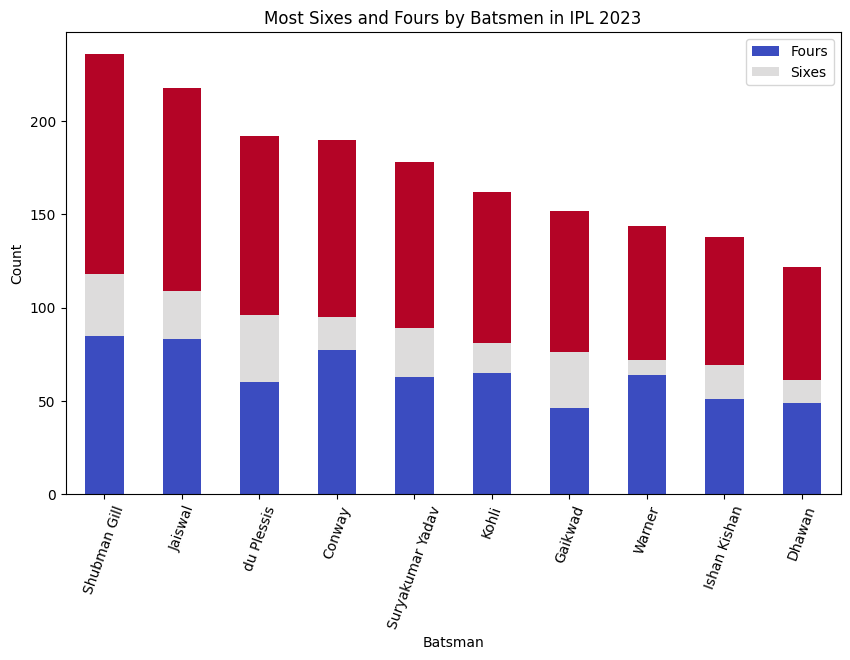

In [11]:
sixes_fours = df[df["runs_of_bat"].isin([4, 6])].groupby(["striker", "runs_of_bat"]).size().unstack(fill_value=0)
sixes_fours["Total"] = sixes_fours[4] + sixes_fours[6]
sixes_fours = sixes_fours.sort_values(by="Total", ascending=False).head(10)

sixes_fours.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="coolwarm")
plt.xlabel("Batsman")
plt.ylabel("Count")
plt.title("Most Sixes and Fours by Batsmen in IPL 2023")
plt.legend(["Fours", "Sixes"])
plt.xticks(rotation=70)
plt.show()

The stacked bar chart visualizes the top 10 batsmen with the most sixes and fours in IPL 2023. Each bar is split into two sections—one for fours and the other for sixes—providing a clear comparison of boundary-hitting ability among players. The x-axis represents batsmen, while the y-axis indicates the total number of boundaries.

- **Top 3 Highest Individual Scores in IPL**

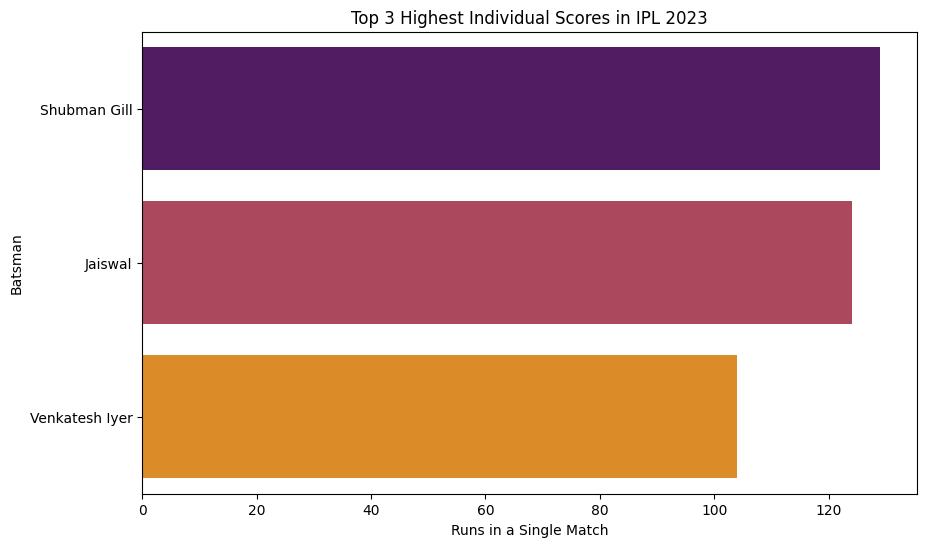

In [12]:
top_match_scores = df.groupby(["match_id", "striker"])["runs_of_bat"].sum().reset_index()
top_match_scores = top_match_scores.sort_values(by="runs_of_bat", ascending=False).head(3)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_match_scores["striker"], x=top_match_scores["runs_of_bat"],hue=top_match_scores["striker"], palette="inferno",legend=False, orient="h")

plt.xlabel("Runs in a Single Match")
plt.ylabel("Batsman")
plt.title("Top 3 Highest Individual Scores in IPL 2023")
plt.show()

This horizontal bar chart highlights the top three highest individual scores in a single match during IPL 2023. The x-axis represents the number of runs scored in a match, while the y-axis shows the respective batsmen. The use of the "inferno" color palette enhances visibility, making it easier to compare performances.

- **Total Runs Scored by Each Team in IPL**

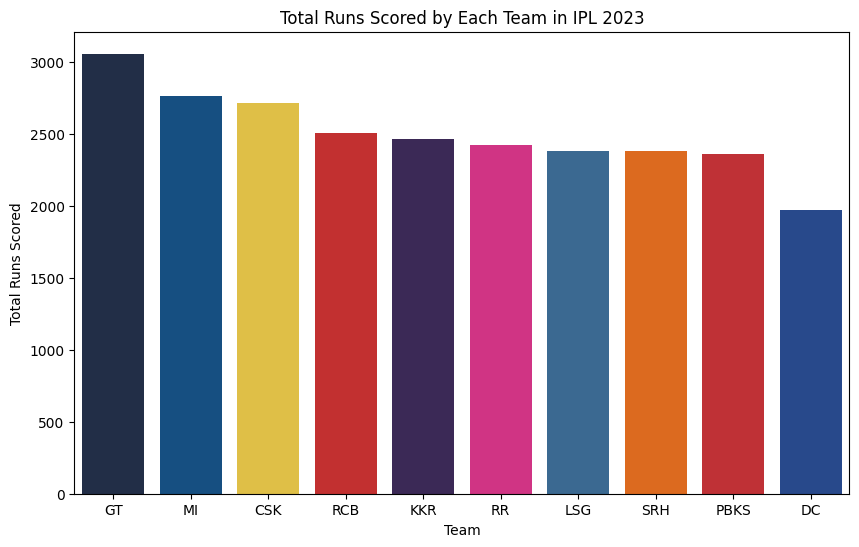

In [13]:
team_runs = df.groupby("batting_team")[["runs_of_bat", "extras"]].sum().sum(axis=1).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
colors = [team_colors[team] for team in team_runs.index]
sns.barplot(x=team_runs.index, y=team_runs.values,hue=colors,legend=False, palette=colors)

plt.xlabel("Team")
plt.ylabel("Total Runs Scored")
plt.title("Total Runs Scored by Each Team in IPL 2023")
plt.xticks(rotation=0)
plt.show()

This bar chart presents the total runs scored by each team in IPL 2023, including both runs from the bat and extras. Each bar is color-coded according to the team's official colors, making it visually distinctive. The x-axis represents the teams, while the y-axis displays their total runs.

- **Percentage of Wickets Taken by Different Modes**

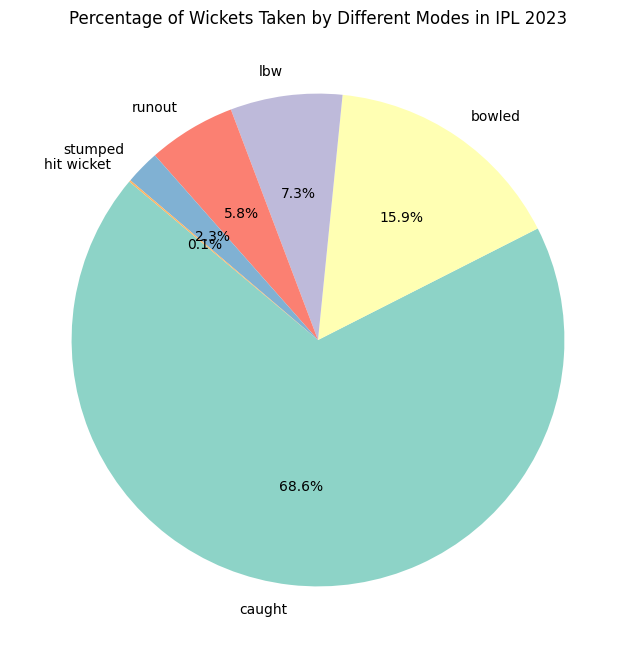

In [14]:
wicket_modes = df["wicket_type"].dropna()
wicket_modes = wicket_modes[wicket_modes != "Not Out"].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(wicket_modes.values, labels=wicket_modes.index, autopct="%1.1f%%", startangle=140, colors=sns.color_palette("Set3"))
plt.title("Percentage of Wickets Taken by Different Modes in IPL 2023")
plt.show()

This pie chart illustrates the distribution of different modes of dismissal in IPL 2023, excluding "Not Out" cases. Each segment represents a specific wicket type, such as bowled, caught, lbw, etc., with the percentage of occurrences labeled. The colors are drawn from the "Set3" palette for better visual distinction.

- **Runs Progression**

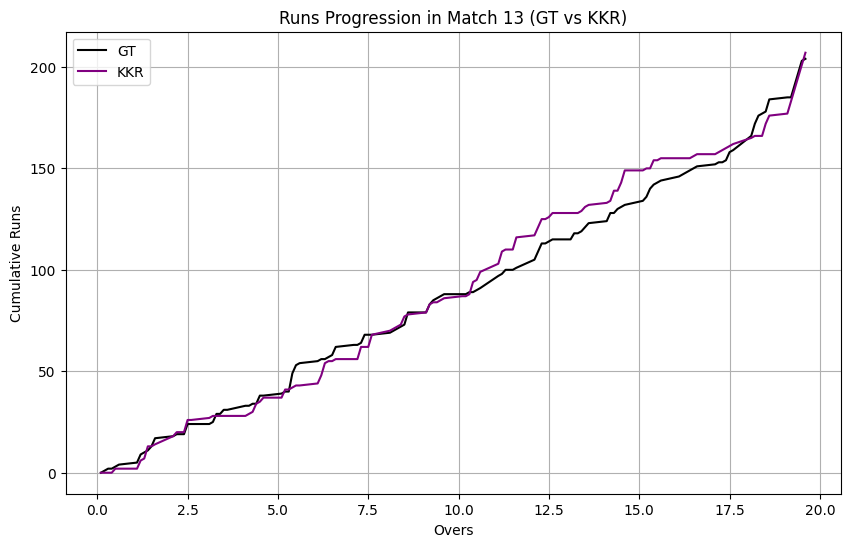

In [15]:
match_13 = df[df["match_no"] == 13]

teams = match_13["batting_team"].unique()
team1, team2 = teams[0], teams[1]

team1_runs = match_13[match_13["batting_team"] == team1].groupby("over")[["runs_of_bat", "extras"]].sum().sum(axis=1).cumsum()
team2_runs = match_13[match_13["batting_team"] == team2].groupby("over")[["runs_of_bat", "extras"]].sum().sum(axis=1).cumsum()

plt.figure(figsize=(10, 6))
plt.plot(team1_runs.index, team1_runs.values, linestyle="-", label=team1, color="Black")
plt.plot(team2_runs.index, team2_runs.values, linestyle="-", label=team2, color="Purple")

plt.xlabel("Overs")
plt.ylabel("Cumulative Runs")
plt.title(f"Runs Progression in Match 13 ({team1} vs {team2})")
plt.legend()
plt.grid(True)
plt.show()

This worm graph visually represents the run progression of both teams in Match 13 of IPL 2023, where Rinku Singh's iconic five sixes in the last over turned the game. The x-axis represents overs, while the y-axis shows cumulative runs. The black line tracks the first batting team's progress, and the purple line represents the chasing team's score. The dramatic spike at the end highlights the thrilling finish of the match.